In [221]:
import pandas as pd

In [222]:
train = pd.read_csv(r'C:\Users\mahe\Downloads\train_NIR5Yl1.csv')
test = pd.read_csv(r'C:\Users\mahe\Downloads\test_8i3B3FC.csv')
train['source'] = 'train'
test['source'] = 'test'

In [223]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,a,3942.0,2.0,155623,7855.0,42.0,train
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,train
2,468453,c,1358.0,4.0,56177,8067.0,60.0,train
3,96996,a,264.0,3.0,168793,27064.0,9.0,train
4,131465,c,4271.0,4.0,112223,13986.0,83.0,train


In [224]:
train.apply(lambda x: sum(x.isnull()))

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
source        0
dtype: int64

In [225]:
data = pd.concat([train, test],ignore_index=True)

In [226]:
data.apply(lambda x: sum(x.isnull()))

ID                 0
Tag                0
Reputation         0
Answers            0
Username           0
Views              0
Upvotes       141448
source             0
dtype: int64

In [227]:
data['Tag'].value_counts()

c    103251
j    103043
p     62120
i     46500
a     45253
s     33411
h     29346
o     20842
r     17755
x      9972
Name: Tag, dtype: int64

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Tag'] = le.fit_transform(data['Tag'])

In [229]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,0,3942.0,2.0,155623,7855.0,42.0,train
1,327662,0,26046.0,12.0,21781,55801.0,1175.0,train
2,468453,1,1358.0,4.0,56177,8067.0,60.0,train
3,96996,0,264.0,3.0,168793,27064.0,9.0,train
4,131465,1,4271.0,4.0,112223,13986.0,83.0,train


In [230]:
data['Username'].value_counts()

4118     1133
17878     836
45704     688
23223     612
62142     608
         ... 
55439       1
8336        1
12434       1
148         1
0           1
Name: Username, Length: 175739, dtype: int64

In [231]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

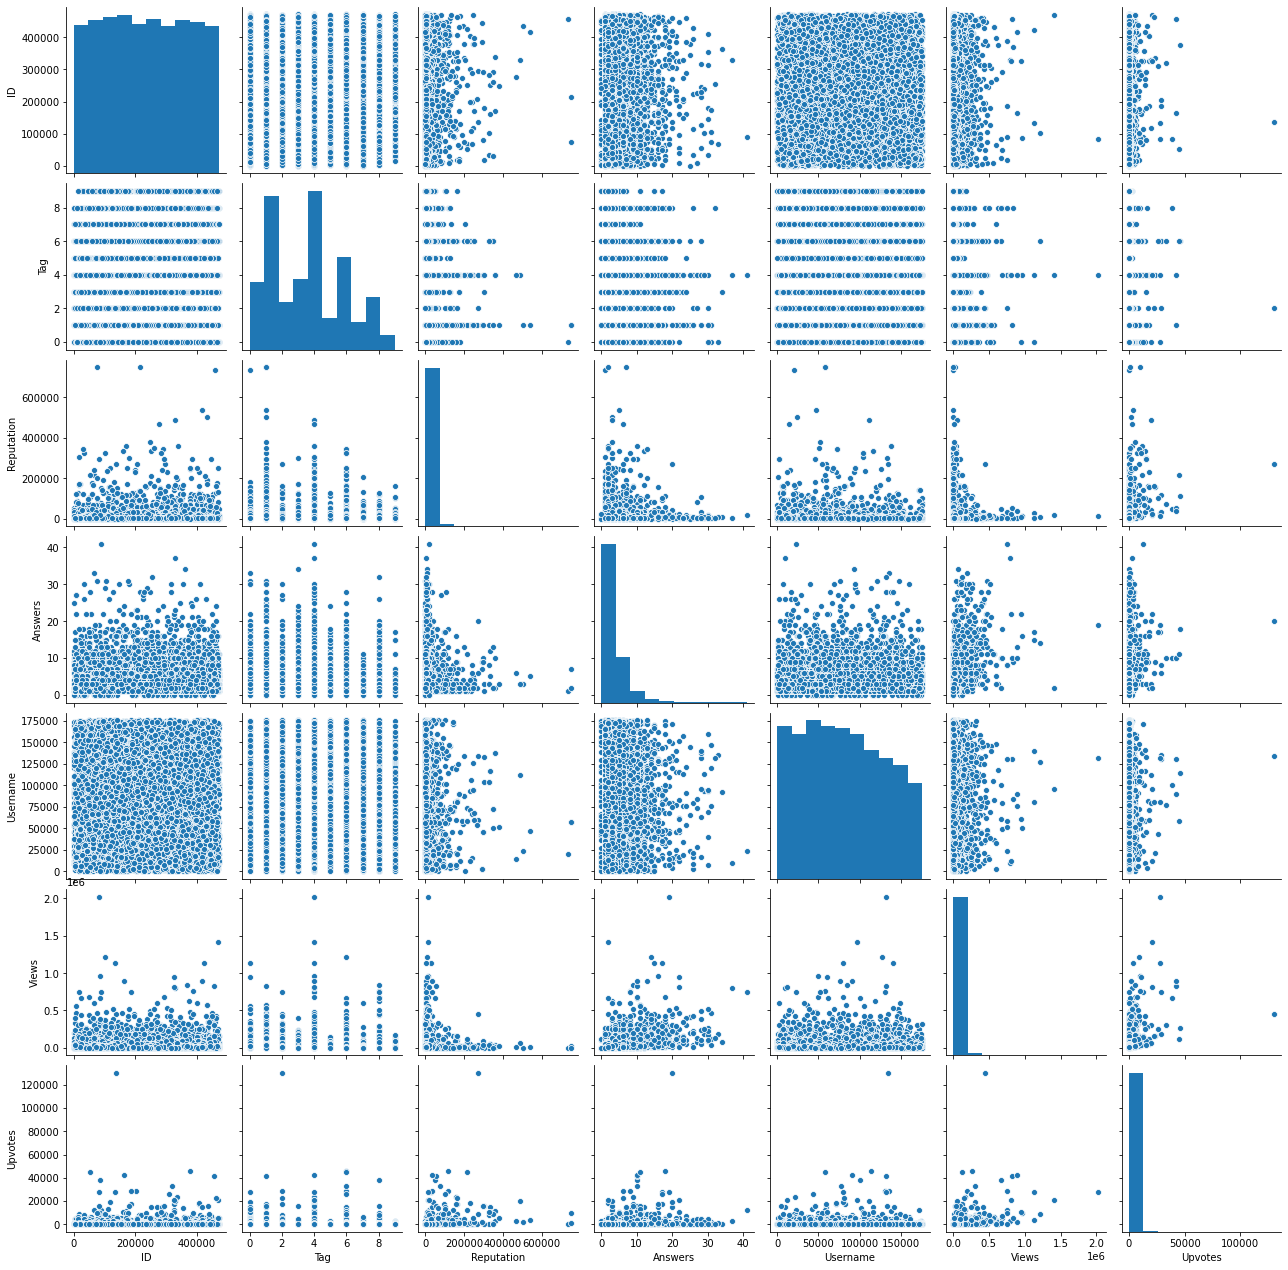

In [232]:
import seaborn as sns
sns.pairplot(train.head(10000))

In [233]:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\users\mahe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
train.drop(['ID','Username'], axis=1,inplace =True)

In [235]:
from sklearn.preprocessing import Binarizer
#Creating a threshold 
bn = Binarizer(threshold=7)
#above 7 is considered as 1 and below 7 we are considering as 0
bn_trans = bn.transform([train['Answers']])[0]
train['Answers'] = bn_trans

<ipython-input-235-f458752ce926>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Answers'] = bn_trans


In [236]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,0.0,7855.0,42.0
1,0,26046.0,1.0,55801.0,1175.0
2,1,1358.0,0.0,8067.0,60.0
3,0,264.0,0.0,27064.0,9.0
4,1,4271.0,0.0,13986.0,83.0


In [237]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [316]:
from sklearn.model_selection import train_test_split
X= train.drop('Upvotes',axis =1)
Y = train['Upvotes']
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =0)

In [317]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
linear_model.score(X_train,Y_train)

0.249184654528362

In [319]:
train.head(10)

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,0.0,7855.0,42.0
1,0,26046.0,1.0,55801.0,1175.0
2,1,1358.0,0.0,8067.0,60.0
3,0,264.0,0.0,27064.0,9.0
4,1,4271.0,0.0,13986.0,83.0
5,7,440.0,0.0,5577.0,4.0
6,1,147.0,0.0,17184.0,17.0
7,4,2269.0,0.0,312.0,3.0
8,4,111.0,0.0,53738.0,79.0
9,1,2749.0,0.0,227.0,0.0


In [320]:
linear_model.coef_

array([ 7.67956151e+00,  3.44042220e-02, -5.34139037e+02,  2.00567065e-02])

In [321]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

Answers      -534.139037
Views           0.020057
Reputation      0.034404
Tag             7.679562
dtype: float64


In [322]:
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


c:\users\mahe\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


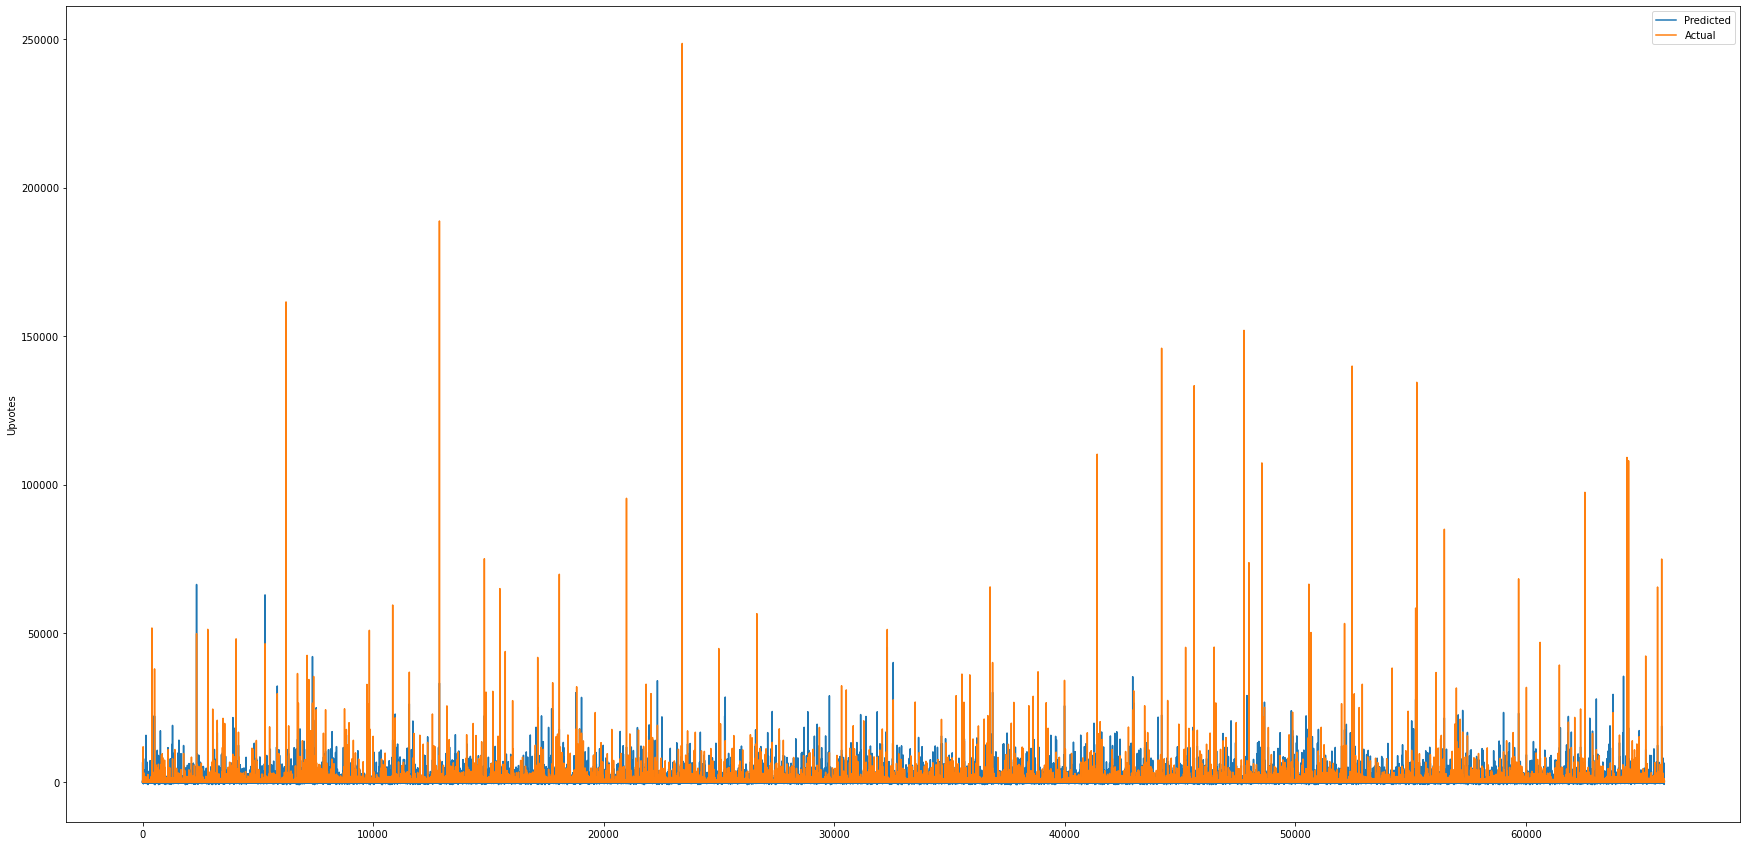

In [323]:
%pylab inline
pylab.rcParams['figure.figsize'] = {15,30}

plt.plot(y_predict,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')
plt.ylabel('Upvotes')

plt.legend()
plt.show()

In [324]:
r_square = linear_model.score(x_test,y_test)

In [325]:
r_square

0.3041738610469384

In [326]:
from sklearn.metrics import mean_squared_error
linear_model_mse = mean_squared_error(y_predict,y_test)

In [327]:
linear_model_mse

5429382.893823545

In [328]:
import math

In [329]:
math.sqrt(linear_model_mse)

2330.1036229797905

In [330]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [331]:
lasso_model.score(X_train,Y_train)

0.2491837901163668

In [332]:
y_predict_lasso = lasso_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


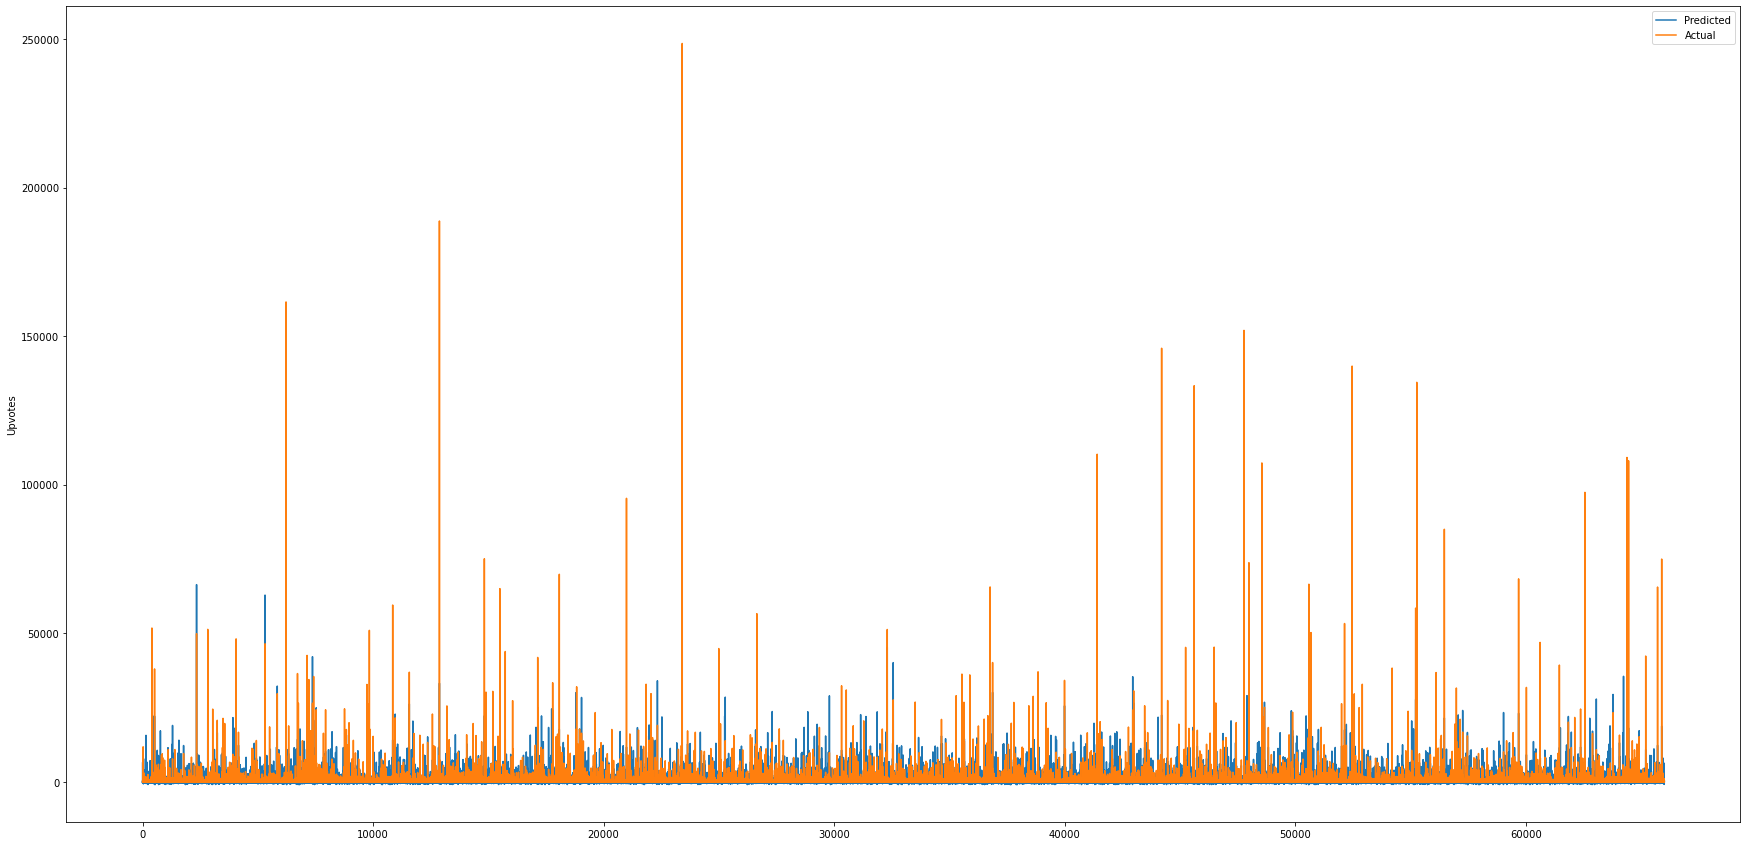

In [333]:
%pylab inline
pylab.rcParams['figure.figsize'] = {15,30}

plt.plot(y_predict_lasso,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')
plt.ylabel('Upvotes')

plt.legend()
plt.show()

In [334]:
r_square = lasso_model.score(x_test,y_test)
r_square

0.3042014880116254

In [335]:
lasso_model_mse = mean_squared_error(y_predict_lasso,y_test)
lasso_model_mse

5429167.326512858

In [336]:
math.sqrt(lasso_model_mse)

2330.057365498296

In [348]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=30, min_samples_leaf=80)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=80, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [349]:
dt_model.score(X_train,Y_train)

0.5496990397058265

In [350]:
y_predict_dt = dt_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


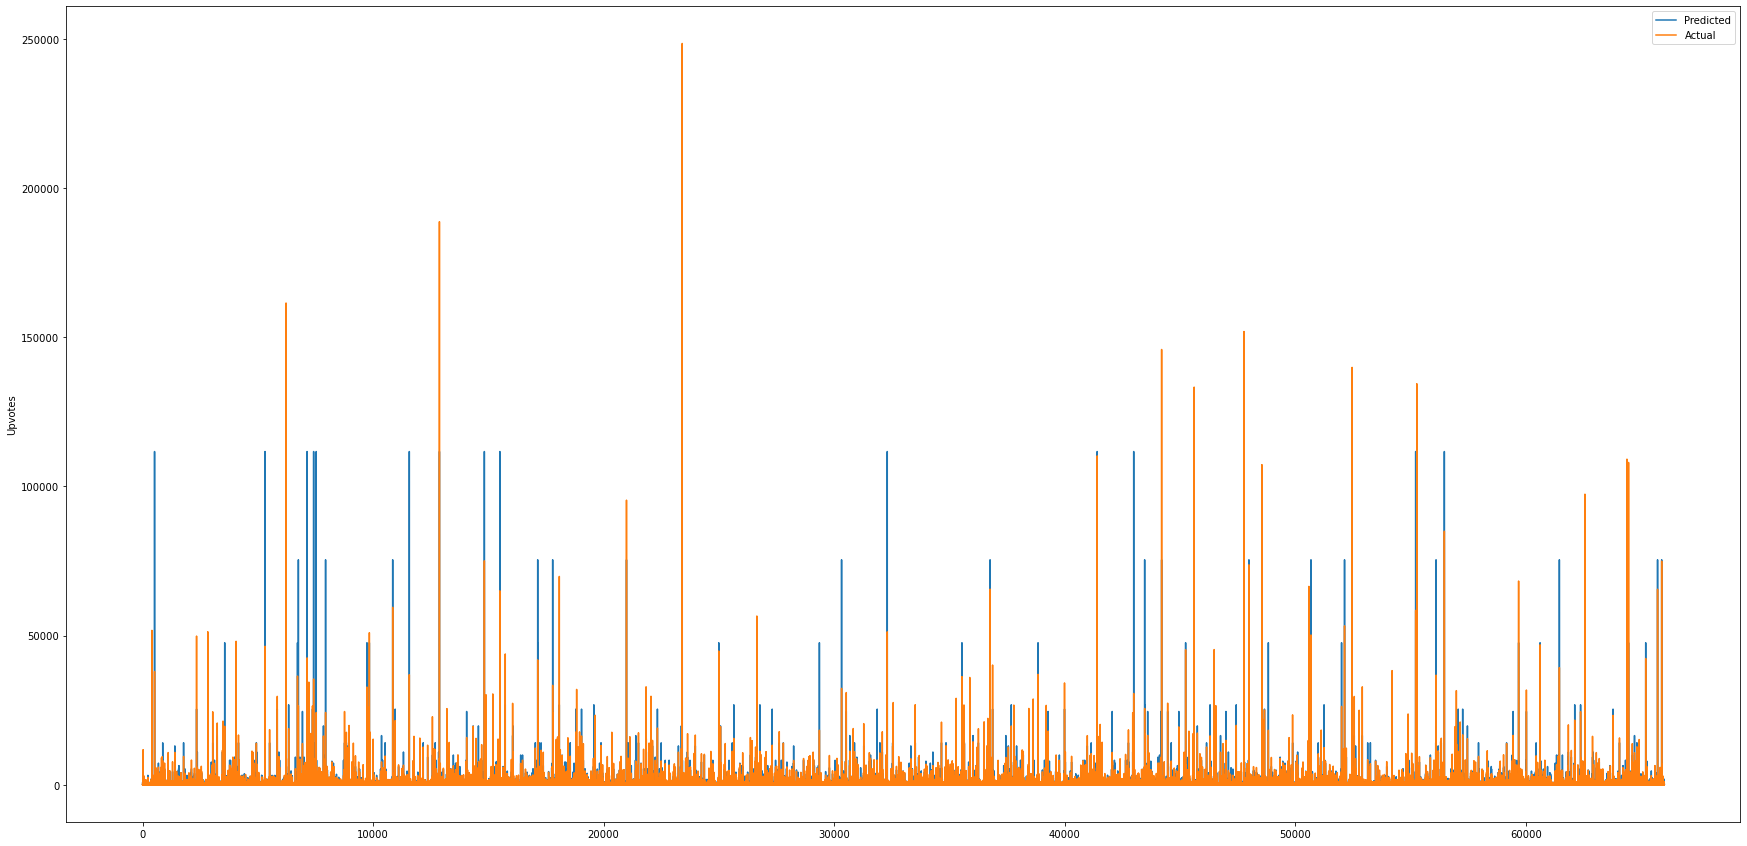

In [351]:
%pylab inline
pylab.rcParams['figure.figsize'] = {15,30}

plt.plot(y_predict_dt,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')
plt.ylabel('Upvotes')

plt.legend()
plt.show()

In [352]:
r_square = dt_model.score(x_test,y_test)
r_square

0.6932006555450958

In [353]:
dt_model_mse = mean_squared_error(y_predict_dt,y_test)
dt_model_mse

2393889.82300376

In [354]:
math.sqrt(dt_model_mse)

1547.2200305721744

In [355]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200,max_depth=20, min_samples_leaf=70,n_jobs=4)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=70,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [356]:
rf_model.score(X_train,Y_train)

0.536611519232759

In [357]:
y_predict_rf = rf_model.predict(x_test)

In [358]:
r_square = rf_model.score(x_test,y_test)
r_square

0.7394989917467365

In [359]:
rf_model_mse = mean_squared_error(y_predict_rf,y_test)
rf_model_mse

2032633.7842986141

In [360]:
math.sqrt(rf_model_mse)

1425.704662368267

In [361]:
X_train

,Tag,Reputation,Answers,Views
144606,0,16.0,0.0,1972.0
251664,4,27.0,0.0,15543.0
248598,2,77.0,0.0,1854.0
255788,8,63.0,0.0,469.0
327167,4,895.0,0.0,26031.0
...,...,...,...,...
122579,1,55500.0,1.0,102128.0
304137,1,842.0,0.0,1564.0
152315,7,41.0,0.0,3080.0
117952,4,1399.0,0.0,17798.0


In [362]:
test = pd.read_csv(r'C:\Users\mahe\Downloads\test_8i3B3FC.csv')

In [363]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [364]:
from sklearn.preprocessing import Binarizer
#Creating a threshold 
bn = Binarizer(threshold=7)
#above 7 is considered as 1 and below 7 we are considering as 0
bn_trans = bn.transform([test['Answers']])[0]
test['Answers'] = bn_trans

In [365]:
test_id = test['ID']

In [366]:
test.drop(['ID','Username'],axis = 1,inplace = True)

In [368]:
test

,Tag,Reputation,Answers,Views
0,a,5645.0,0.0,33200.0
1,c,24511.0,0.0,2730.0
2,i,927.0,0.0,21167.0
3,i,21.0,0.0,18528.0
4,i,4475.0,1.0,57240.0
...,...,...,...,...
141443,j,4681.0,0.0,2469.0
141444,j,7782.0,0.0,18998.0
141445,p,435.0,0.0,57048.0
141446,o,176.0,0.0,10193.0


In [371]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Tag'] = le.fit_transform(test['Tag'])

In [372]:
y_pred_rf = rf_model.predict(test)

In [373]:
test['Upvote Predictions'] = y_pred_rf

In [374]:
test['ID']=test_id

In [375]:
test.drop(['Tag','Reputation','Answers','Views'],axis = 1,inplace = True)

In [376]:
test.to_csv(r'C:\Users\mahe\Desktop\Task 1\test_withpred.csv',index= False)

In [377]:
test

,Upvote Predictions,ID
0,237.455005,366953
1,79.784913,71864
2,46.625272,141692
3,11.173887,316833
4,324.196534,440445
...,...,...
141443,22.794616,47187
141444,171.283187,329126
141445,78.929781,282334
141446,19.914530,386629
